In [1]:
import sys
sys.path.append('..')

from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from chapters.chapter7 import CI
from chapters.chapter8 import bootstrap, bootstrap_variance
from chapters.chapter9 import parametric_bootstrap, parametric_bootstrap_variance

%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.style.use('ggplot')

In [2]:
z = norm(0, 1)
z

Create 100 iid $N(\mu, 1)$ observations.  The parameter $\mu$ is treated as unknown but we use $\mu = 5$ for this excercise.

In [3]:
mu = 5
n = 100
dist = norm(mu, 1)
seed_true = 848499898
obs = pd.Series(dist.rvs(size=n, random_state=seed_true), name='observations')
obs.head()

0    5.394624
1    4.427541
2    4.897425
3    5.535372
4    2.725620
Name: observations, dtype: float64

The MLE for the mean of a normal random variable is the sample mean.

In [4]:
mu_hat = obs.mean()
mu_hat

4.9601917334990571

The true value we want to estimate is $e^5$.

In [5]:
mu = np.exp(5)
mu

148.4131591025766

The delta method tells us that the MLE for $e^\mu$ is simply $\hat \theta = e^{\bar X_n}$.

In [6]:
theta_hat = np.exp(mu_hat)
theta_hat

142.62113852558542

In [7]:
statistic = lambda os: np.exp(np.mean(os))
statistic(obs)

142.62113852558542

In [8]:
seed_boot = 221589
se_boot = np.sqrt(bootstrap_variance(obs, statistic, 10000, random_state=seed_boot))
se_boot

14.676173495562781

In [9]:
alpha = 0.95
z_alpha = np.abs(z.ppf(alpha/2))

ci_boot = CI(theta_hat - z_alpha*se_boot, theta_hat + z_alpha*se_boot)
ci_boot

CI(lower=141.7008429731431, upper=143.54143407802775)

In [10]:
dist_hat = norm(mu_hat, 1)
seed_pboot = 84874545
se_pboot = np.sqrt(parametric_bootstrap_variance(dist_hat, n, statistic, 10000, random_state=seed_pboot))
se_pboot

14.337112916105779

In [11]:
ci_pboot = CI(theta_hat - z_alpha*se_pboot, theta_hat + z_alpha*se_pboot)
ci_pboot

CI(lower=141.72210436960839, upper=143.52017268156246)

For the delta method, note that the fisher information for $\hat \mu$ is n = 100 (see example 9.21).  The corresponding se is $\sqrt(1/100) = 1/10$. It follows that the se for $\hat \theta$ is $e^{\bar X} / 10$.

In [12]:
se_delta = theta_hat / np.sqrt(n)
se_delta

14.262113852558542

In [13]:
ci_delta = CI(theta_hat - z_alpha*se_delta, theta_hat + z_alpha*se_delta)
ci_delta

CI(lower=141.72680731923219, upper=143.51546973193865)

In [14]:
z_alpha

0.062706777943213846

Let's compare the histograms.

In [24]:
df_true = pd.DataFrame({'value': np.exp(dist.rvs(size=1000, random_state=seed_true))})
df_true['variable'] = 'true'
df_true.head()

,value,variable
0,220.219377,true
1,83.725320,true
2,133.944480,true
3,253.502043,true
4,15.265872,true


In [16]:
df_boot = pd.DataFrame({'value': list(bootstrap(obs, statistic, 10000, random_state=seed_boot))})
df_boot['variable'] = 'bootstrap'
df_boot.head()

,value,variable
0,134.325152,bootstrap
1,147.034258,bootstrap
2,127.026658,bootstrap
3,153.824603,bootstrap
4,142.015515,bootstrap


In [17]:
df_pboot = pd.DataFrame({'value': list(parametric_bootstrap(dist_hat, n, statistic, 10000, random_state=seed_pboot))})
df_pboot['variable'] = 'parametric bootstrap'
df_pboot.head()

,value,variable
0,133.107286,parametric bootstrap
1,142.541450,parametric bootstrap
2,136.793573,parametric bootstrap
3,145.920992,parametric bootstrap
4,149.603131,parametric bootstrap


In [18]:
seed_delta = 3654
df_delta = pd.DataFrame({'value': norm(theta_hat, se_delta**2).rvs(n, random_state=seed_delta)})
df_delta['variable'] = 'delta'
df_delta.head()

,value,variable
0,-325.259050,delta
1,175.997965,delta
2,132.739507,delta
3,49.634961,delta
4,136.950813,delta


In [27]:
df = pd.concat((df_true, df_boot, df_pboot, df_delta))
df.sample(10)

,value,variable
8840,130.570764,parametric bootstrap
8981,147.522017,bootstrap
5296,123.863086,bootstrap
7204,120.818192,bootstrap
171,141.373543,parametric bootstrap
2212,146.702056,parametric bootstrap
1906,165.557383,parametric bootstrap
180,146.151744,parametric bootstrap
719,131.377223,parametric bootstrap
4369,156.189442,bootstrap


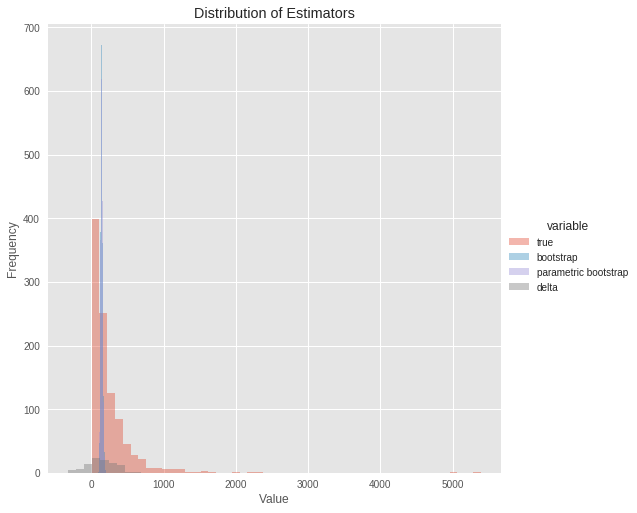

In [28]:
g = sns.FacetGrid(df, hue='variable', size=7)
g.map(sns.distplot, 'value', kde=False).add_legend()
g.set(xlabel='Value', ylabel='Frequency', title='Distribution of Estimators')
g.savefig('../images/ch09q09_histogram.svg')

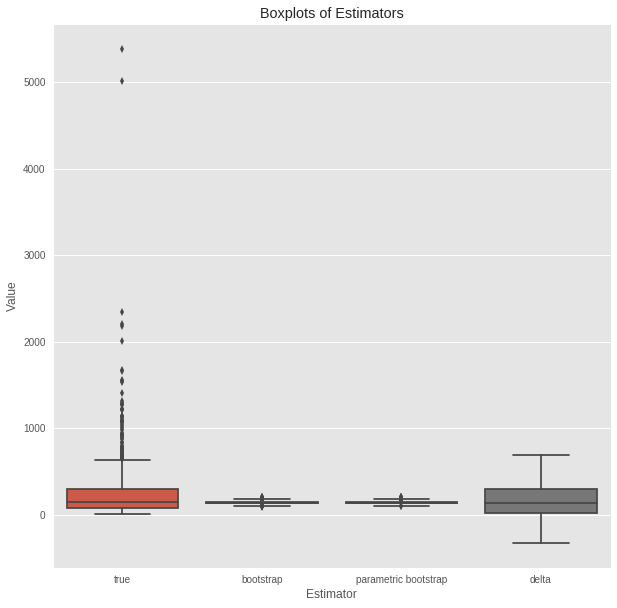

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
g = sns.boxplot('variable', 'value', data=df, ax=ax)
g.set(ylabel='Value', xlabel='Estimator', title='Boxplots of Estimators')
g.figure.savefig('../images/ch09q09_boxplot.svg')

Both bootstrap methods give very good approximations.  The delta method is the worst.